- http://d.hatena.ne.jp/shakezo/20121221/1356089207
- http://data-science.gr.jp/implementation/iml_sklearn_random_forest.html

In [2]:
import numpy as np
from sklearn.cross_validation import KFold, train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.grid_search import GridSearchCV
import pandas as pd

import warnings #エラーを防ぐ
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [2]:
train_df6 =pd.read_csv("train.csv", header=0)
test_df6 =pd.read_csv("test.csv", header=0)
test_df6.tail()

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
413,1,0.377084,0,0,8.0500,0,0,1,0,0,1
414,0,0.486409,0,0,108.9000,1,0,0,1,0,0
415,1,0.480145,0,0,7.2500,0,0,1,0,0,1
416,1,0.377084,0,0,8.0500,0,0,1,0,0,1
417,1,0.377084,1,1,22.3583,0,0,1,1,0,0


In [14]:
# 学習データと評価データに分ける
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

def split_valid_test_data(data, fraction=(0.1)):
    #目的変数を抽出
    data_y = data["Survived"]
    lb = LabelBinarizer()
    data_y = lb.fit_transform(data_y)#arrayにしている
    
    #目的変数を消す
    data_x = data.drop(["Survived"], axis=1)
    
    #pandasで分ける
    train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=fraction)

    return train_x.values, train_y, valid_x.values, valid_y

train_x, train_y, valid_x, valid_y = split_valid_test_data(train_df6)
print("train_x:{}".format(train_x.shape))
print("train_y:{}".format(train_y.shape))
print("valid_x:{}".format(valid_x.shape))
print("valid_y:{}".format(valid_y.shape))
train_y = train_y.T[0]
valid_y = valid_y.T[0]

train_x:(801, 11)
train_y:(801, 1)
valid_x:(90, 11)
valid_y:(90, 1)


In [15]:
params={
        "n_jobs":4,#CPU数
        "random_state":1,#シード
        #"max_depth":None,
        #"max_features":"auto",
  
        #"n_estimators":10
        }

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(**params)

class_cv = GridSearchCV(forest,
                   {
                     "n_estimators":[10,100,1000],
                   },verbose = 1)
class_cv.fit(train_x,train_y)
print(class_cv.best_score_)#評価関数でのスコア、通常は正答率に該当
print(class_cv.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
0.8014981273408239
{'n_estimators': 100}


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.7s finished


In [16]:
params={
        "n_jobs":4,#CPU数
        "random_state":1,#シード
        #"max_depth":None,
        #"max_features":"auto",
  
        "n_estimators":100
        }


forest = RandomForestClassifier(**params)
forest.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [17]:
# 識別率を確認
predicted = forest.predict(valid_x)
sum(predicted == valid_y) / len(valid_y)


0.8222222222222222

In [32]:
predicted = forest.predict(test_df6.values)
submission =pd.read_csv("id.csv", header=0)
submission["Survived"] = predicted
submission.to_csv("submission_rf.csv",index=False)
submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1


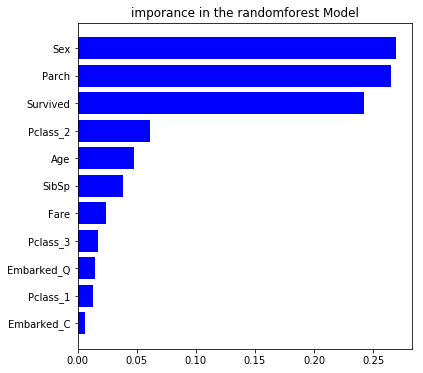

In [31]:
import matplotlib.pyplot as plt

features = train_df6.columns
importances = forest.feature_importances_
#番号指定
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.title("imporance in the randomforest Model")
plt.show()